In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('TATATECH.NS', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", 
             "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8,2023-12-12,1254.000000,1263.050049,1230.000000,1233.250000,1233.250000,2426780
9,2023-12-13,1244.000000,1284.800049,1236.150024,1250.349976,1250.349976,4281933
10,2023-12-14,1270.000000,1275.000000,1240.150024,1243.300049,1243.300049,1992554
11,2023-12-15,1255.949951,1256.699951,1240.000000,1242.199951,1242.199951,1239743
12,2023-12-18,1245.650024,1249.150024,1225.599976,1229.250000,1229.250000,1000620


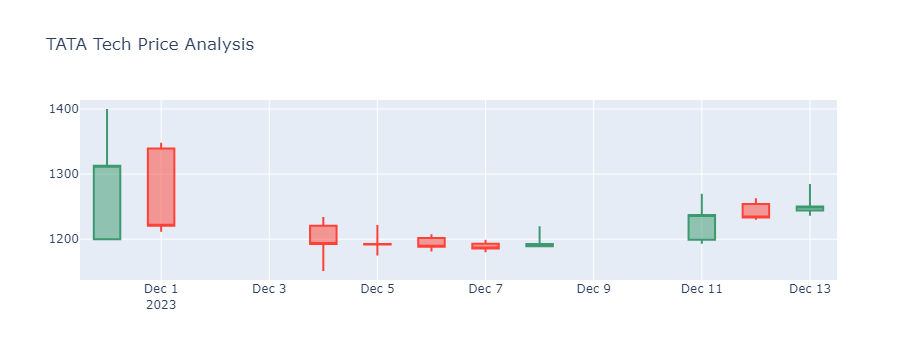

In [26]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "TATA Tech Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [2]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.848628
Volume       0.638182
Low          0.553628
Open         0.196836
Date         0.059089
Name: Close, dtype: float64


In [3]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=30)

Epoch 1/30
8/8 [==============================] - 5s 11ms/step - loss: 1166362.0000
Epoch 2/30
8/8 [==============================] - 0s 7ms/step - loss: 1123071.5000
Epoch 3/30
8/8 [==============================] - 0s 9ms/step - loss: 1079732.5000
Epoch 4/30
8/8 [==============================] - 0s 8ms/step - loss: 1042430.0000
Epoch 5/30
8/8 [==============================] - 0s 8ms/step - loss: 1006180.8125
Epoch 6/30
8/8 [==============================] - 0s 8ms/step - loss: 967746.2500
Epoch 7/30
8/8 [==============================] - 0s 12ms/step - loss: 925069.1875
Epoch 8/30
8/8 [==============================] - 0s 11ms/step - loss: 879254.3125
Epoch 9/30
8/8 [==============================] - 0s 8ms/step - loss: 834463.2500
Epoch 10/30
8/8 [==============================] - 0s 9ms/step - loss: 797149.5625
Epoch 11/30
8/8 [==============================] - 0s 6ms/step - loss: 766178.0625
Epoch 12/30
8/8 [==============================] - 0s 8ms/step - loss: 736967.7500
Epoch

In [31]:
import numpy as np
#features = [Open, High, Low, Adj Close, Volume]
features = np.array([[1192.949951,1199.000000,1180.000000,1185.699951,1624651]])
model.predict(features)

1/1 [==============================] - 1s 1s/step


array([[692.5191]], dtype=float32)